In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
exoplanet_data = pd.read_csv('updated_exoplanet_data_with_filled_nulls.csv')

# Identify the planet name column
planet_name_column = 'Planet Name'


In [9]:
# Select only the numerical columns excluding the planet name
numerical_data = exoplanet_data.select_dtypes(include=['float64', 'int64']).drop(columns=[planet_name_column], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()


In [10]:
# Set a correlation threshold
threshold = 0.8

# Find pairs of highly correlated features
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_pairs.append((correlation_matrix.columns[j], colname, correlation_matrix.iloc[i, j]))

# Convert to DataFrame for easier viewing
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
print("Highly Correlated Features:")
print(high_corr_df)


Highly Correlated Features:
                 Feature 1                Feature 2  Correlation
0                 Parallax            Proper Motion     0.820790
1  Star Mass Error (Lower)  Star Mass Error (Upper)    -0.992626
2                 Distance   Distance Error (Lower)     0.833113
3                 Distance   Distance Error (Upper)    -0.841700
4   Distance Error (Lower)   Distance Error (Upper)    -0.958141
5   Parallax Error (Lower)   Parallax Error (Upper)    -1.000000
6           Orbital Period     Semi-Major Axis (AU)     0.980923
7              Star Radius         Star Radius (AU)     1.000000


In [11]:
# Features to drop based on correlation (update this list as needed)
features_to_drop = [
    'Star Mass Error (Lower)', 
    'Star Mass Error (Upper)', 
    'Distance Error (Lower)', 
    'Distance Error (Upper)', 
    'Parallax Error (Lower)', 
    'Parallax Error (Upper)',
    'Proper Motion',           
    'Semi-Major Axis (AU)',   
    'Star Radius (AU)', 
    'Unnamed: 0'  # Included this for removal in one go
]

# Drop the features
exoplanet_data_cleaned = exoplanet_data.drop(columns=features_to_drop, errors='ignore')

# Re-add the planet name column
exoplanet_data_cleaned[planet_name_column] = exoplanet_data[planet_name_column]


In [12]:
# Check the resulting DataFrame and remaining features
print(exoplanet_data_cleaned.head())
remaining_features = exoplanet_data_cleaned.columns
print("Remaining Features:")
print(remaining_features)


    Planet Name Planet Letter Host Star Name  Orbital Period  \
0  OGLE-TR-10 b             b     OGLE-TR-10        0.053206   
1  BD-08 2823 c             c     BD-08 2823        4.095693   
2   HD 110014 b             b      HD 110014       13.352748   
3    GJ 667 C f             f       GJ 667 C        0.673922   
4    GJ 667 C g             g       GJ 667 C        4.449195   

   Orbital Eccentricity  Orbital Inclination  Planet Radius (Earth Radii)  \
0                 0.820            90.000000                       14.011   
1                 0.190            86.903172                       12.500   
2                 0.462            86.903172                       12.400   
3                 0.030            86.903172                        1.450   
4                 0.080            86.903172                        1.990   

   Planet Density  Equilibrium Temperature  Insolation Flux  ...  \
0           0.400              1521.027837     3.324320e-15  ...   
1           0.29

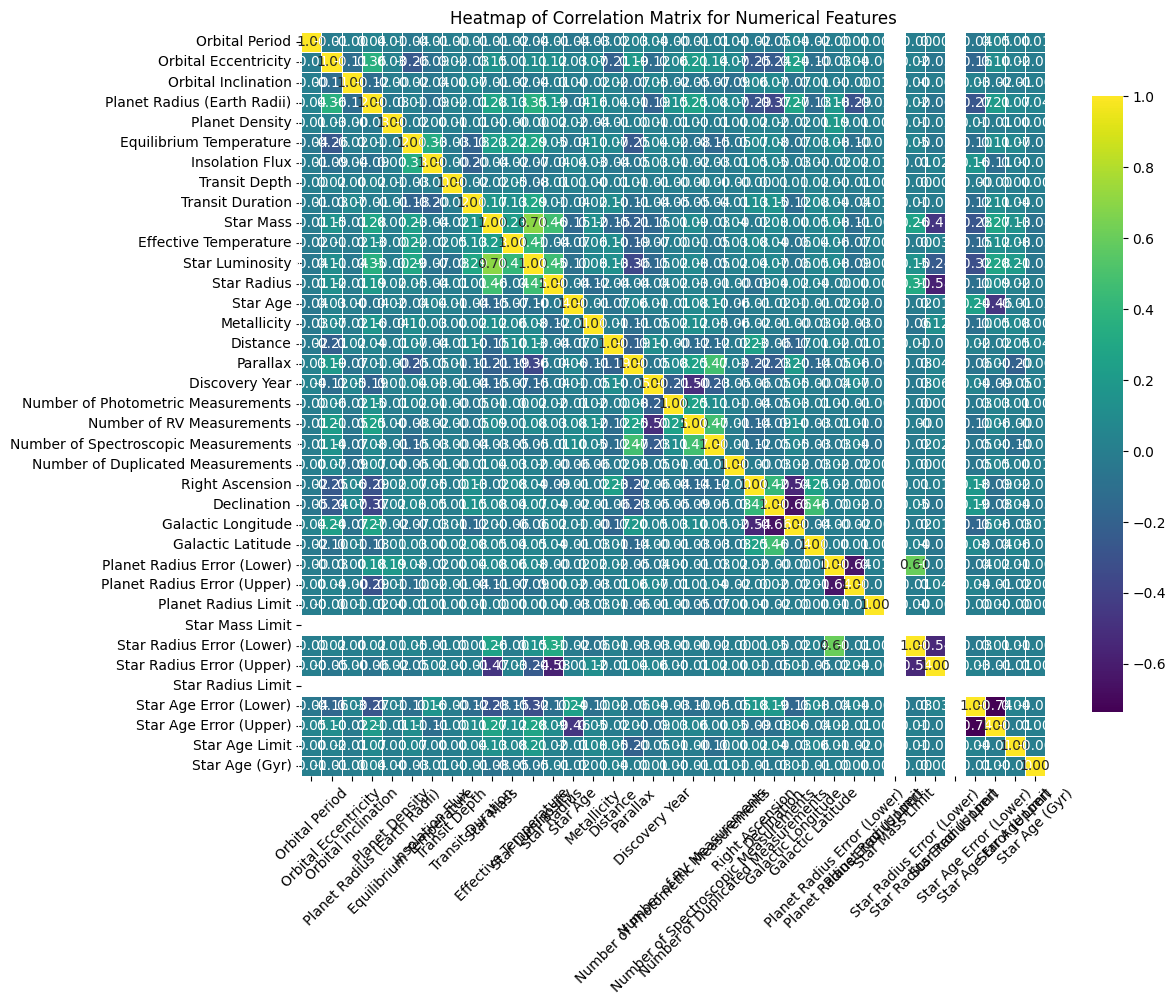

In [20]:

# Select only numerical columns for correlation analysis again (after cleaning)
numerical_data_cleaned = exoplanet_data_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation_matrix_cleaned = numerical_data_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix_cleaned, annot=True, fmt=".2f", cmap='viridis'

, 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Heatmap of Correlation Matrix for Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [14]:
# Save the cleaned DataFrame
exoplanet_data_cleaned.to_csv('Remove_Correlated_Columns.csv', index=False)
print("Cleaned DataFrame saved as 'Remove_Correlated_Columns.csv'")


Cleaned DataFrame saved as 'Remove_Correlated_Columns.csv'
